# Verwerken SV office tijdreeksen concentratie profielen
Auteur: Arjen Oord   
Datum: 31 mei 2018   
Project: Spaarwater 2   
In opdracht van: Sieger Burger   
Versie: 1.0   


Voor elk model (per directory) is in de output voor elke 30 dagen een verticaal profiel weggeschreven van concentraties.   

Het doel van dit script is om per directory een tijdreeks te maken van de diepte van de 1000 mg/l contour door:
- elk van de bestandjes in te lezen
- de tijdstap te bepalen waarin de waarde het dichtst bij 1000 mg/l zit
- te controleren of die waarde in de buurt is van de 1000 mg/l en niet bijvoorbeel 9999.99 als dichtstbijzijnde waarde
- per directory (model) een tijdreeks in een excel tab weg te schrijven
- Alle modellen in één excel file


In [83]:
import os, glob, re, linecache
import pandas as pd
import numpy as np
from pylab import *
%matplotlib inline

In [90]:
# example input file
with open(r'D:\Scripts\svoffice\Sieger\Model1\output\Concentratie_1.txt', 'r') as f:
    content = f.readlines()
    for c in content: print c,

{
FlexPDE Version 6.50/W64  16:07:14 Jan 31 2017
basismodel_sin_kort.pde  16:17:47 5/28/18
Title: Concentratie
from (0.1,0)
to (0.1,-5)
 Time 0
<c> , <X> , <Y> 
}
  9.9999999514,    0.1000000000,    0.0000000000
  14.401752073,    0.1000000000,   -0.0204301375
  19.071575885,    0.1000000000,   -0.0408602750
  24.009460503,    0.1000000000,   -0.0612904124
  28.86142062,    0.1000000000,   -0.0803639502
  34.689434556,    0.1000000000,   -0.1021506874
  40.431524607,    0.1000000000,   -0.1225808249
  44.765588247,    0.1000000000,   -0.1374042079
  48.527361,    0.1000000000,   -0.1498954995
  52.389344541,    0.1000000000,   -0.1623867911
  55.68892646,    0.1000000000,   -0.1728109392
  60.413943988,    0.1000000000,   -0.1873693744
  64.576559859,    0.1000000000,   -0.1998606660
  67.806532005,    0.1000000000,   -0.2096429194
  73.834845247,    0.1000000000,   -0.2269481086
  77.665432974,    0.1000000000,   -0.2373867911
  82.448140949,    0.1000000000,   -0.2498954995
  87.4407

In [12]:
def natural_sort(l): 
    '''
    human sort of filenames in list. Returns sorted list
    https://stackoverflow.com/questions/4836710/does-python-have-a-built-in-function-for-string-natural-sort
    '''
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

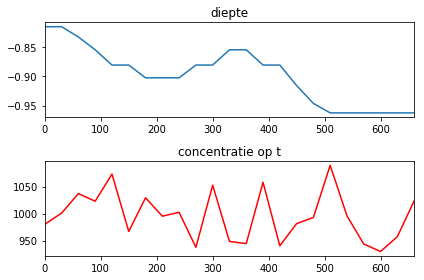

<Figure size 432x288 with 0 Axes>

In [89]:
'''
loop through all subdirs from current folder
find output dir in each of the subdirs
find time series of y-position of 1000 mg/l for each timestep 
separate file for each timestep
manually edit the glob search criteria as necessary
'''

dirs = [x[0] for x in os.walk('./')]
dirs = [i for i in dirs if 'output' in i]
writer = pd.ExcelWriter('sv_concentratie.xlsx')

for dirname in dirs:
    fig, ax = subplots(2)
    title = os.path.split(os.path.split(dirname)[0])[-1]  # does not work properly if ',' in directory name
    files = glob.glob(dirname + '/Concentratie*.txt')  # manually edit the search criteria
    files = natural_sort(files)
    t,y,c = [],[],[]
    for f in files: 
        time = linecache.getline(f, 7)  # tijdstap
        time = [int(s) for s in time.split() if s.isdigit()][0]
        df = pd.read_csv(f, skiprows=9, names = ['c','x','y'])
        df['diff'] = (df.c - 1000.).abs()
        idx = df['diff'].idxmin()
        t.append(time)
        y.append(df.y[idx])
        c.append(df.c[idx])
    ts = pd.DataFrame({'y': y,
                       'c': c
                       }, index = t)
    ts.to_excel(writer, sheet_name=title)
    ts.y.plot(ax=ax[0], title='diepte')
    ts.c.plot(style='r-', ax=ax[1], title='concentratie op t')
    fig.tight_layout()
    show()
    savefig('{}.png'.format(title))
    close(fig)
    
writer.save()    